# Project 1: SAT & ACT Analysis

The first markdown cell in a notebook is a great place to provide an overview of your entire project. You will likely want to at least state your

## Problem Statement

Define the problem you are finding answers for from the data given.

## Executive Summary

If you want to, it's great to use relative links to direct your audience to various sections of a notebook. **HERE'S A DEMONSTRATION WITH THE CURRENT SECTION HEADERS**:

### Contents:
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

*All libraries used should be added here*

In [4]:
#Imports:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [5]:
#Code:
sat_2017 = pd.read_csv('../data/sat_2017.csv')
act_2017 = pd.read_csv('../data/act_2017.csv')


In [6]:
type(sat_2017)

pandas.core.frame.DataFrame

#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [9]:
sat_2017.loc[:10,]
#sat_2017.loc[40:,]

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


In [10]:
act_2017.loc[:10,]
#act_2017.loc[45:,]

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


In [11]:
sat_2017.shape

(51, 5)

In [12]:
act_2017.shape

(52, 7)

In [13]:
#odd that act_2017 has one more row than sat_2017 perhaps sat_2017 is missing out one state 

check = act_2017["State"]

for i in sat_2017["State"]:
    missing = []
    if i not in check:
        missing.append(i)

missing
#the extra 1 row is because act_17 has a 'national row' that sat_17 does not 
#find out why this code doesn't work though 

['Wyoming']

In [14]:
sat_2017.info() #getting more info on our data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
State                                 51 non-null object
Participation                         51 non-null object
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [15]:
act_2017.info() #getting more info on our data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
State            52 non-null object
Participation    52 non-null object
English          52 non-null float64
Math             52 non-null float64
Reading          52 non-null float64
Science          52 non-null float64
Composite        52 non-null object
dtypes: float64(4), object(3)
memory usage: 3.0+ KB


In [16]:
type(act_2017.loc[0,"Composite"]) #flagging out that Composite inputs for act_17 are string instead of numeric type

str

In [17]:
sat_2017.describe()#getting summary stats 

,Evidence-Based Reading and Writing,Math,Total
count,51.000000,51.000000,51.000000
mean,569.117647,547.627451,1126.098039
std,45.666901,84.909119,92.494812
min,482.000000,52.000000,950.000000
25%,533.500000,522.000000,1055.500000
50%,559.000000,548.000000,1107.000000
75%,613.000000,599.000000,1212.000000
max,644.000000,651.000000,1295.000000


In [18]:
#based on describe() and info() figured that participation does not appear because it is not a numeric type

def convert_percent(val):
    new_val = val.replace('%','')
    return float(new_val)

#Convert the string number value for participation to a float
#remove all % 
#Convert to float type    

In [19]:
#use the pandas apply function to apply convert_precent above the 'Participation' column.
#reassign values to orginal df
sat_2017["Participation"] = sat_2017["Participation"].apply(convert_percent)

In [20]:
sat_2017.head() #checking to confirm that Participation type has changed successfully 

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5.0,593,572,1165
1,Alaska,38.0,547,533,1080
2,Arizona,30.0,563,553,1116
3,Arkansas,3.0,614,594,1208
4,California,53.0,531,524,1055


In [21]:
type(sat_2017.loc[0,"Participation"])

numpy.float64

In [22]:
#use the pandas apply function to apply convert_precent above the 'Participation' column for act_17
act_2017["Participation"] = act_2017["Participation"].apply(convert_percent)


,Participation,Evidence-Based Reading and Writing,Math,Total
count,51.000000,51.000000,51.000000,51.000000
mean,39.803922,569.117647,547.627451,1126.098039
std,35.276632,45.666901,84.909119,92.494812
min,2.000000,482.000000,52.000000,950.000000
25%,4.000000,533.500000,522.000000,1055.500000
50%,38.000000,559.000000,548.000000,1107.000000
75%,66.000000,613.000000,599.000000,1212.000000
max,100.000000,644.000000,651.000000,1295.000000


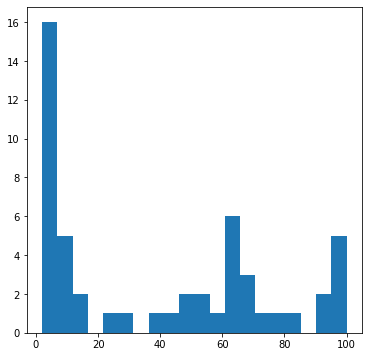

In [23]:
#initial histogram plot showing 2017 SAT participation rates 
#initial survey of this shows that almost half of the states have particiapation rates of <~15%

plt.figure(figsize=(6,6))
plt.hist(sat_2017['Participation'],bins=20);

sat_2017.describe()

#note that Math min value is '52' which is suspiciously low 

In [24]:
sat_2017['Participation'].median()

38.0

,Participation,English,Math,Reading,Science
count,52.000000,52.000000,52.000000,52.000000,52.000000
mean,65.153846,20.919231,21.173077,22.001923,21.040385
std,31.832518,2.332132,1.963602,2.048672,3.151113
min,8.000000,16.300000,18.000000,18.100000,2.300000
25%,31.000000,19.000000,19.400000,20.475000,19.900000
50%,68.000000,20.550000,20.900000,21.700000,21.150000
75%,100.000000,23.300000,23.100000,24.125000,22.525000
max,100.000000,25.500000,25.300000,26.000000,24.900000


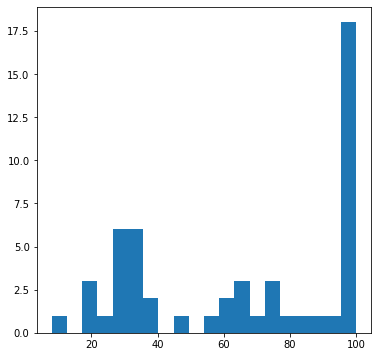

In [25]:
#initial histogram plot showing 2017 ACT participation rates 
#initial survey of this shows that almost 1/3 of the states have 100% participation rate

plt.figure(figsize=(6,6))
plt.hist(act_2017['Participation'],bins=20);

act_2017.describe()

#min Science score of '2.3' is suspicious

In [26]:
act_2017['Participation'].median()

68.0

#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

Answer:
SAT 2017:
There are a total of 51 data points for the SAT 2017 scores, each corresponding to the average of SAT scores and participation rate for each of the 51 states. 

Median of 38% is slightly lower than the mean of 39.8%, implying that data is slightly right-skewed. 

Wide range from 2-100% participation rate, with interquartile range (4-66%) implying that the data is quite spread out about the median (38%) We can infer that the middle 'half' of the data is leaning towards a lower participation rate (<66%) and aligns with implied right-skewness based on said median-mean comparison.

ACT 2017:
There are a total of 52 data points for the ACT 2017 scores, each corresponding to the average of ACT scores and participation rate for each of the 52 states. 

Median of 68% is slightly higher than the mean of 65.1%, implying that data is slightly left-skewed. 

Wide range from 8-100% participation rate, with interquartile range (31-100%) implying that the data is quite spread out about the median (68%) We can infer that the middle 'half' of the data is leaning towards a higher participation rate (>31%) and aligns with implied left-skewness based on median mean comparison.



#### 4a. Does the data look complete? 

Answer:

SAT scores has one less data point (51) then ACT scores (52) this needs to be reconciled - found out that this is due to ACT having an extra row containing 'national sores'. 

'Participation' is a string type in both ACT and SAT 2017 scores while 'Composite' is also s string type in ACT 2017 scores so these should be converted to numeric type to analyze them further.

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

Answer:

SAT 2017
(Reading & Writing) Min: 482   Max: 644
(Math) Min: 52  Max: 651

ACT 2017
(English) Min: 16.3 Max: 25.5
(Math) Min: 18 Max: 25.3
(Reading) Min: 18.1 Max: 26
(Science) Min: 2.3 Max: 24.9 

Potential Discrepancies:
1) SAT 2017 Math min score appears rather low
2) ACT 2017 Science min score appears rather low 



#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

In [27]:
sat_2017.loc[20,"Math"] #SAT maryland math value needs to be changed to 524

52

In [28]:
sat_2017.loc[20,"Math"] = 524

In [29]:
act_2017.loc[21,"Science"] #act_17 maryland science value has to be changed to 23.2 


2.3

In [30]:
act_2017.loc[21,"Science"] = 23.2

In [31]:
act_2017.loc[51,"Composite"] #act_17 composite score has to be changed to 20.2 

'20.2x'

In [32]:
act_2017.loc[51,"Composite"] = 20.2

#### 5. What are your data types? 
Display the data types of each feature. 

In [33]:
act_2017.info() #composite column data typs need to be changed from string to numeric type

sat_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
State            52 non-null object
Participation    52 non-null float64
English          52 non-null float64
Math             52 non-null float64
Reading          52 non-null float64
Science          52 non-null float64
Composite        52 non-null object
dtypes: float64(5), object(2)
memory usage: 3.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
State                                 51 non-null object
Participation                         51 non-null float64
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
dtypes: float64(1), int64(3), object(1)
memory usage: 2.1+ KB


What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

Answer:

SAT and ACT Participation is an object - string type (but already fixed in step 1) 

ACT composite score is a string type that needs to be changed to a numeric type (probably float)


#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [154]:
#Convert the string number value to a float
#remove all % 
#Convert to float type    

def convert_percent(val):
    new_val = val.replace('%','')
    return float(new_val)

#(converted in previous steps alr though)
#use the pandas apply function to apply convert_precent above the 'Participation' column.
sat_2017["Participation"] = sat_2017["Participation"].apply(convert_percent)

#use the pandas apply function to apply convert_precent above the 'Participation' column.
act_2017["Participation"] = act_2017["Participation"].apply(convert_percent)

- Fix any individual values preventing other columns from being the appropriate type.

In [35]:
# using pandas to_numeric() function to convert string to float type
act_2017['Composite'] = pd.to_numeric(act_2017['Composite'])

- Finish your data modifications by making sure the columns are now typed appropriately.

- Display the data types again to confirm they are correct.

In [153]:
#Code:
act_2017.info()
sat_2017.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 1 to 51
Data columns (total 7 columns):
state                   51 non-null object
act17_participation%    51 non-null float64
act17_eng               51 non-null float64
act17_math              51 non-null float64
act17_reading           51 non-null float64
act17_sci               51 non-null float64
act17_composite         51 non-null float64
dtypes: float64(6), object(1)
memory usage: 3.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
state                    51 non-null object
sat17_participation%     51 non-null float64
sat17_reading_writing    51 non-null int64
sat17_math               51 non-null int64
sat17_total              51 non-null int64
dtypes: float64(1), int64(3), object(1)
memory usage: 2.1+ KB


#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [37]:
#renaming the sat_2017 columns 

sat_2017.columns = ['state','sat17_participation%','sat17_reading_writing','sat17_math','sat17_total']

sat_2017.head()


,state,sat17_participation%,sat17_reading_writing,sat17_math,sat17_total
0,Alabama,5.0,593,572,1165
1,Alaska,38.0,547,533,1080
2,Arizona,30.0,563,553,1116
3,Arkansas,3.0,614,594,1208
4,California,53.0,531,524,1055


In [38]:
#renaming the sat_2017 columns 

act_2017.columns = ['state','act17_participation%','act17_eng','act17_math','act17_reading','act17_sci','act17_composite']

act_2017.head()

,state,act17_participation%,act17_eng,act17_math,act17_reading,act17_sci,act17_composite
0,National,60.0,20.3,20.7,21.4,21.0,21.0
1,Alabama,100.0,18.9,18.4,19.7,19.4,19.2
2,Alaska,65.0,18.7,19.8,20.4,19.9,19.8
3,Arizona,62.0,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4


#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|column name|int/float/object|ACT/SAT|This is an example| 


|Name|Type|Source|Description|
|---|---|---|---|
|**state**|*string*|2017 SAT Scores|American state names| 
|**sat17_participation%**|*float*|2017 SAT Scores|The state average participation rate in each state represented in %. A total of 1,715,481 students were tested across all states.|
|**sat18_participation%**|*float*|2018 SAT Scores|The state average participation rate in each state represented in %. A total of 1,715,481 students were tested across all states.|
|**sat17_reading_writing**|*Int*|2017 SAT Scores|The state average reading & writing test score in each state. Highest possible score is 800. |
|**sat17_math**|*Int*|2017 SAT Scores|The state average math score in each state. Highest possible score is 800. |
|**sat17_total**|*Int*|2017 SAT Scores|The state average total SAT score in each state. Highest possible score is 1600. |
|**sat18_reading_writing**|*Int*|2018 SAT Scores|The state average reading & writing test score in each state. Highest possible score is 800. |
|**sat18_math**|*Int*|2018 SAT Scores|The state average math score in each state. Highest possible score is 800. |
|**sat18_total**|*Int*|2018 SAT Scores|The state average total SAT score in each state. Highest possible score is 1600. |
|**act17_participation%**|*float*|2017 ACT Scores|The state average particpation rate in each state represented in % |
|**act18_participation%**|*float*|2018 ACT Scores|The state average particpation rate in each state represented in %|
|**act17_eng**|*float*|2017 ACT Scores|The state average english composite score in each state. Highest possible score is 36. |
|**act17_math**|*float*|2017 SAT Scores|The state average math composite score in each state. Highest possible score is 36. |
|**act17_reading**|*float*|2017 ACT Scores|The state average composite reading score in each state. Highest possible score is 36. |
|**act17_sci**|*float*|2017 ACT Scores|The state average composite science score in each state. Highest possible score is 36. |
|**act17_composite**|*float*|2017 ACT Scores|The state average, average total composite score. This is the total composite score averaged across the 4 ACT subject test components.  |
|**act18_eng**|*float*|2018 ACT Scores|The state average english composite score in each state. Highest possible score is 36. |
|**act18_math**|*float*|2018 SAT Scores|The state average math composite score in each state. Highest possible score is 36. |
|**act18_reading**|*float*|2018 ACT Scores|The state average composite reading score in each state. Highest possible score is 36. |
|**act18_sci**|*float*|2018 ACT Scores|The state average composite science score in each state. Highest possible score is 36. |
|**act18_composite**|*float*|2018 ACT Scores|The state average, average total composite score. This is the total composite score averaged across the 4 ACT subject test components.  |


A Data Dictionary is a collection of names, definitions, and attributes about data elements that are being used or captured in a database, information system, or part of a research project. It describes the meanings and purposes of data elements within the context of a project, and provides guidance on interpretation, accepted meanings and representation. A Data Dictionary also provides metadata about data elements. The metadata included in a Data Dictionary can assist in defining the scope and characteristics of data elements, as well the rules for their usage and application. 

#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [39]:
#based on previous observations this would be the 'national' row in the act17 dataframe 

act_2017 = act_2017.drop([0], axis=0)

act_2017.head()


,state,act17_participation%,act17_eng,act17_math,act17_reading,act17_sci,act17_composite
1,Alabama,100.0,18.9,18.4,19.7,19.4,19.2
2,Alaska,65.0,18.7,19.8,20.4,19.9,19.8
3,Arizona,62.0,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4
5,California,31.0,22.5,22.7,23.1,22.2,22.8


#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [40]:
act_sat17 = pd.merge(act_2017, sat_2017, how='right')
act_sat17.head()


,state,act17_participation%,act17_eng,act17_math,act17_reading,act17_sci,act17_composite,sat17_participation%,sat17_reading_writing,sat17_math,sat17_total
0,Alabama,100.0,18.9,18.4,19.7,19.4,19.2,5.0,593,572,1165
1,Alaska,65.0,18.7,19.8,20.4,19.9,19.8,38.0,547,533,1080
2,Arizona,62.0,18.6,19.8,20.1,19.8,19.7,30.0,563,553,1116
3,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4,3.0,614,594,1208
4,California,31.0,22.5,22.7,23.1,22.2,22.8,53.0,531,524,1055


In [41]:
print(act_2017.shape)
print(sat_2017.shape)
print(act_sat17.shape)

#number of rows remain the same post merger, columns have increased to 11 as they have merged on state 

(51, 7)
(51, 5)
(51, 11)


#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [42]:
#df.to_csv(file_name, sep='\t', encoding='utf-8')

act_sat17.to_csv('../data/combined_2017.csv', index=False)

## 2018 Data Import and Cleaning

Links to the 2018 ACT and SAT data are provided in the README. These data live in PDFs, and so you'll get to enjoy practicing some *manual* data collection. Save these data as a CSV in your `data` directory, and import, explore, and clean these data in the same way you did above. **Make sure you comment on your steps so it is clear *why* you are doing each process**.

In [43]:
#using act_2018_updated.csv and sat_2018.csv

#manually compared act_2018_updated.csv to the online pdf report. found one discrepancy for Delaware's average
# composite score 

#Code:
sat_2018 = pd.read_csv('../data/sat_2018.csv')
act_2018 = pd.read_csv('../data/act_2018_updated.csv')


In [44]:
sat_2018.head() #checking out the file 

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,6%,595,571,1166
1,Alaska,43%,562,544,1106
2,Arizona,29%,577,572,1149
3,Arkansas,5%,592,576,1169
4,California,60%,540,536,1076


In [45]:
sat_2018.info()
#similar to 2018 data, Participation needs to be changed to float type 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
State                                 51 non-null object
Participation                         51 non-null object
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [46]:
act_2018.head() #checking out the file 

,State,Percentage of Students Tested,Average Composite Score,Average English Score,Average Math Score,Average Reading Score,Average Science Score
0,Alabama,100,19.1,18.9,18.3,19.6,19.0
1,Alaska,33,20.8,19.8,20.6,21.6,20.7
2,Arizona,66,19.2,18.2,19.4,19.5,19.2
3,Arkansas,100,19.4,19.1,18.9,19.7,19.4
4,California,27,22.7,22.5,22.5,23.0,22.1


In [47]:
act_2018.info() #% of students tested is already int type here

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 7 columns):
State                            51 non-null object
Percentage of Students Tested    51 non-null int64
Average Composite Score          51 non-null float64
Average English Score            51 non-null float64
Average Math Score               51 non-null float64
Average Reading Score            51 non-null float64
Average Science Score            51 non-null float64
dtypes: float64(5), int64(1), object(1)
memory usage: 2.9+ KB


In [48]:
#def convert_percent(val):
    #new_val = val.replace('%','')
    #return float(new_val)

#use the pandas apply function to apply convert_precent defined previously to the 'Participation' column.
sat_2018["Participation"] = sat_2018["Participation"].apply(convert_percent)

In [49]:
sat_2018.info() #checking that Participation has been casted to float type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
State                                 51 non-null object
Participation                         51 non-null float64
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
dtypes: float64(1), int64(3), object(1)
memory usage: 2.1+ KB


In [50]:
sat_2018.describe() #data generally seems plausible (i.e. no wild min or max points)

,Participation,Evidence-Based Reading and Writing,Math,Total
count,51.000000,51.000000,51.000000,51.000000
mean,45.745098,563.686275,556.235294,1120.019608
std,37.314256,47.502627,47.772623,94.155083
min,2.000000,480.000000,480.000000,977.000000
25%,4.500000,534.500000,522.500000,1057.500000
50%,52.000000,552.000000,544.000000,1098.000000
75%,77.500000,610.500000,593.500000,1204.000000
max,100.000000,643.000000,655.000000,1298.000000


In [51]:
act_2018.describe() #data generally seems plausible (i.e. no wild min or max points)

,Percentage of Students Tested,Average Composite Score,Average English Score,Average Math Score,Average Reading Score,Average Science Score
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,61.647059,21.486275,20.988235,21.125490,22.015686,21.345098
std,34.080976,2.106278,2.446356,2.035765,2.167245,1.870114
min,7.000000,17.700000,16.600000,17.800000,18.000000,17.900000
25%,28.500000,19.950000,19.100000,19.400000,20.450000,19.850000
50%,66.000000,21.300000,20.200000,20.700000,21.600000,21.100000
75%,100.000000,23.550000,23.700000,23.150000,24.100000,23.050000
max,100.000000,25.600000,26.000000,25.200000,26.100000,24.900000


Cleaning up and re-naming the files

In [52]:
#renaming the sat_2018 columns 

sat_2018.columns = ['state','sat18_participation%','sat18_reading_writing','sat18_math','sat18_total']

sat_2018.head()

,state,sat18_participation%,sat18_reading_writing,sat18_math,sat18_total
0,Alabama,6.0,595,571,1166
1,Alaska,43.0,562,544,1106
2,Arizona,29.0,577,572,1149
3,Arkansas,5.0,592,576,1169
4,California,60.0,540,536,1076


In [53]:
#renaming the act_2018 columns 

act_2018.columns = ['state','act18_participation%','act18_composite','act18_eng','act18_math','act18_reading','act18_sci']

act_2018.head()


,state,act18_participation%,act18_composite,act18_eng,act18_math,act18_reading,act18_sci
0,Alabama,100,19.1,18.9,18.3,19.6,19.0
1,Alaska,33,20.8,19.8,20.6,21.6,20.7
2,Arizona,66,19.2,18.2,19.4,19.5,19.2
3,Arkansas,100,19.4,19.1,18.9,19.7,19.4
4,California,27,22.7,22.5,22.5,23.0,22.1


#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [54]:
#combining act and sat scores for 2018 first
act_sat18 = pd.merge(act_2018, sat_2018, how='right')
act_sat18.head()


,state,act18_participation%,act18_composite,act18_eng,act18_math,act18_reading,act18_sci,sat18_participation%,sat18_reading_writing,sat18_math,sat18_total
0,Alabama,100,19.1,18.9,18.3,19.6,19.0,6.0,595,571,1166
1,Alaska,33,20.8,19.8,20.6,21.6,20.7,43.0,562,544,1106
2,Arizona,66,19.2,18.2,19.4,19.5,19.2,29.0,577,572,1149
3,Arkansas,100,19.4,19.1,18.9,19.7,19.4,5.0,592,576,1169
4,California,27,22.7,22.5,22.5,23.0,22.1,60.0,540,536,1076


In [55]:
#checking that merge went ok. rows are fine, columns seem properly merged on state
print(act_2018.shape)
print(sat_2018.shape)
print(act_sat18.shape)

(51, 7)
(51, 5)
(51, 11)


In [56]:
#combining combined 2017 and 2018 act and sat scores 
act_sat1718 = pd.merge(act_sat17, act_sat18, how='right')
act_sat1718.head()



,state,act17_participation%,act17_eng,act17_math,act17_reading,act17_sci,act17_composite,sat17_participation%,sat17_reading_writing,sat17_math,...,act18_participation%,act18_composite,act18_eng,act18_math,act18_reading,act18_sci,sat18_participation%,sat18_reading_writing,sat18_math,sat18_total
0,Alabama,100.0,18.9,18.4,19.7,19.4,19.2,5.0,593,572,...,100,19.1,18.9,18.3,19.6,19.0,6.0,595,571,1166
1,Alaska,65.0,18.7,19.8,20.4,19.9,19.8,38.0,547,533,...,33,20.8,19.8,20.6,21.6,20.7,43.0,562,544,1106
2,Arizona,62.0,18.6,19.8,20.1,19.8,19.7,30.0,563,553,...,66,19.2,18.2,19.4,19.5,19.2,29.0,577,572,1149
3,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4,3.0,614,594,...,100,19.4,19.1,18.9,19.7,19.4,5.0,592,576,1169
4,California,31.0,22.5,22.7,23.1,22.2,22.8,53.0,531,524,...,27,22.7,22.5,22.5,23.0,22.1,60.0,540,536,1076


In [57]:
#checking that merge went ok. rows are fine, columns seem properly merged on state
print(act_sat1718.shape)

(51, 21)


In [58]:
act_sat1718.to_csv('../data/final.csv', index=False)

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [59]:
act_sat1718.describe().T

,count,mean,std,min,25%,50%,75%,max
act17_participation%,51.0,65.254902,32.140842,8.0,31.00,69.0,100.00,100.0
act17_eng,51.0,20.931373,2.353677,16.3,19.00,20.7,23.30,25.5
act17_math,51.0,21.182353,1.981989,18.0,19.40,20.9,23.10,25.3
act17_reading,51.0,22.013725,2.067271,18.1,20.45,21.8,24.15,26.0
act17_sci,51.0,21.450980,1.739353,18.2,19.95,21.3,23.20,24.9
act17_composite,51.0,21.519608,2.020695,17.8,19.80,21.4,23.60,25.5
sat17_participation%,51.0,39.803922,35.276632,2.0,4.00,38.0,66.00,100.0
sat17_reading_writing,51.0,569.117647,45.666901,482.0,533.50,559.0,613.00,644.0
sat17_math,51.0,556.882353,47.121395,468.0,523.50,548.0,599.00,651.0
sat17_total,51.0,1126.098039,92.494812,950.0,1055.50,1107.0,1212.00,1295.0


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [60]:
act17_eng = act_sat1718["act17_eng"]

In [61]:
act17_eng.mean()

20.931372549019606

In [62]:
act_sat1718["act17_eng"].count()

51

In [63]:
type(act17_eng)

pandas.core.series.Series

In [64]:
import math

def std_dev(metric):
    sd = 0
    for i in act_sat1718[metric]:
        sd += (float(i)-act_sat1718[metric].mean())**2
    sd = math.sqrt(sd/act_sat1718[metric].count())
    return sd
#what this does is to iterate within each chosen column/metric, convert metric to float minus the mean squared
#and add it to sd with each iteration (this is the summation part of the formula)
#act_sat1718[metric].count gives the 'n' value of the column
#the final line takes the square root of the summation above over 'n'

In [65]:
std_dev("act17_eng") 
#test
#not sure why the standard deviation differs slightly from python's inbuilt std dev. 2.33 VS 2.35 

2.3304876369363363

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [66]:
act_sat1718.head()

,state,act17_participation%,act17_eng,act17_math,act17_reading,act17_sci,act17_composite,sat17_participation%,sat17_reading_writing,sat17_math,...,act18_participation%,act18_composite,act18_eng,act18_math,act18_reading,act18_sci,sat18_participation%,sat18_reading_writing,sat18_math,sat18_total
0,Alabama,100.0,18.9,18.4,19.7,19.4,19.2,5.0,593,572,...,100,19.1,18.9,18.3,19.6,19.0,6.0,595,571,1166
1,Alaska,65.0,18.7,19.8,20.4,19.9,19.8,38.0,547,533,...,33,20.8,19.8,20.6,21.6,20.7,43.0,562,544,1106
2,Arizona,62.0,18.6,19.8,20.1,19.8,19.7,30.0,563,553,...,66,19.2,18.2,19.4,19.5,19.2,29.0,577,572,1149
3,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4,3.0,614,594,...,100,19.4,19.1,18.9,19.7,19.4,5.0,592,576,1169
4,California,31.0,22.5,22.7,23.1,22.2,22.8,53.0,531,524,...,27,22.7,22.5,22.5,23.0,22.1,60.0,540,536,1076


In [67]:
#used .column() function to generate list of column names to input here
act_sat1718_col = ['act17_participation%', 'act17_eng', 'act17_math',
       'act17_reading', 'act17_sci', 'act17_composite', 'sat17_participation%',
       'sat17_reading_writing', 'sat17_math', 'sat17_total',
       'act18_participation%', 'act18_composite', 'act18_eng', 'act18_math',
       'act18_reading', 'act18_sci', 'sat18_participation%',
       'sat18_reading_writing', 'sat18_math', 'sat18_total']

In [68]:
#using the map function to apply my standard deviation function above to all numeric columns in the dataframe 
act_sat_sd = list(map(std_dev, act_sat1718_col))

#figure out a better way to filter out the non-numeric columns
#right now i'm just manually removing the non-numeric column names from the column list (basically just state)

In [69]:
act_sat_sd = zip(act_sat1718_col, act_sat_sd)

Standard Deviation Results using own function 

In [70]:
dict(act_sat_sd)

{'act17_participation%': 31.824175751231806,
 'act17_eng': 2.3304876369363363,
 'act17_math': 1.9624620273436781,
 'act17_reading': 2.0469029314842646,
 'act17_sci': 1.7222161451443676,
 'act17_composite': 2.000786081581989,
 'sat17_participation%': 34.92907076664508,
 'sat17_reading_writing': 45.21697020437866,
 'sat17_math': 46.65713364485503,
 'sat17_total': 91.58351056778743,
 'act18_participation%': 33.745194881997506,
 'act18_composite': 2.0855261815801147,
 'act18_eng': 2.4222536143202795,
 'act18_math': 2.015707255555717,
 'act18_reading': 2.145891884510421,
 'act18_sci': 1.8516885484833543,
 'sat18_participation%': 36.946619223539415,
 'sat18_reading_writing': 47.03460978357609,
 'sat18_math': 47.30194550378352,
 'sat18_total': 93.22742384464433}

Standard Deviation Results using Describe function 

In [71]:
#stats from .describe() function for comparison
act_sat1718.describe().iloc[2,:]

act17_participation%     32.140842
act17_eng                 2.353677
act17_math                1.981989
act17_reading             2.067271
act17_sci                 1.739353
act17_composite           2.020695
sat17_participation%     35.276632
sat17_reading_writing    45.666901
sat17_math               47.121395
sat17_total              92.494812
act18_participation%     34.080976
act18_composite           2.106278
act18_eng                 2.446356
act18_math                2.035765
act18_reading             2.167245
act18_sci                 1.870114
sat18_participation%     37.314256
sat18_reading_writing    47.502627
sat18_math               47.772623
sat18_total              94.155083
Name: std, dtype: float64

In [72]:
def np_std_dev(metric):
    for i in act_sat1718[metric]:
        sd = np.std(act_sat1718[metric])
    return sd


In [73]:
np_std = list(map(np_std_dev,act_sat1718_col))


In [74]:
np_std = zip(act_sat1718_col, np_std)

Standard Deviation Results using Numpy's np.std() function 

In [75]:
#standard deviations using numpy's np.std() function 
dict(np_std)

{'act17_participation%': 31.824175751231806,
 'act17_eng': 2.3304876369363363,
 'act17_math': 1.9624620273436781,
 'act17_reading': 2.0469029314842646,
 'act17_sci': 1.7222161451443676,
 'act17_composite': 2.000786081581989,
 'sat17_participation%': 34.92907076664508,
 'sat17_reading_writing': 45.21697020437866,
 'sat17_math': 46.65713364485503,
 'sat17_total': 91.58351056778743,
 'act18_participation%': 33.745194881997506,
 'act18_composite': 2.0855261815801147,
 'act18_eng': 2.4222536143202795,
 'act18_math': 2.015707255555717,
 'act18_reading': 2.145891884510421,
 'act18_sci': 1.8516885484833543,
 'sat18_participation%': 36.946619223539415,
 'sat18_reading_writing': 47.03460978357609,
 'sat18_math': 47.30194550378352,
 'sat18_total': 93.22742384464433}

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

Answer:

Calculated standard deviations using my manual function are slightly higher than the output from Pandas' describe method. However, they are similar to the output from Numpy's std method.

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT? 
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

Using Boolean Filters 

Colorado's ACT participation rate dropped from 100% in 2017 to 30% in 2018 - pretty drastic. 
Most of the other countries in the list had 100% participation rate across both years.
17 states had 100% participation rate in both 2017 and 2018


In [76]:
#trying out filtering via boolean 
act_sat1718[(act_sat1718['act17_participation%']==100.0) | (act_sat1718['act18_participation%'] ==100)].iloc[:,[0,1,act_sat1718.columns.get_loc("act18_participation%")]]


,state,act17_participation%,act18_participation%
0,Alabama,100.0,100
3,Arkansas,100.0,100
5,Colorado,100.0,30
17,Kentucky,100.0,100
18,Louisiana,100.0,100
23,Minnesota,100.0,99
24,Mississippi,100.0,100
25,Missouri,100.0,100
26,Montana,100.0,100
27,Nebraska,84.0,100


There were only 4 states 100% participation rates for SAT in 2017 and 5 states in 2018. 

Colarado is an interesting data point again as it shows a drastic increase in participation % from 11% in 2017 to 100% in 2018. 

Participation rates appear to be lower overall compared to ACT participation rates across both years 

In [77]:
act_sat1718[(act_sat1718['sat17_participation%']==100.0) | (act_sat1718['sat18_participation%'] ==100)].iloc[:,[0,act_sat1718.columns.get_loc("sat17_participation%"),act_sat1718.columns.get_loc("sat18_participation%")]]


,state,sat17_participation%,sat18_participation%
5,Colorado,11.0,100.0
6,Connecticut,100.0,100.0
7,Delaware,100.0,100.0
8,District of Columbia,100.0,92.0
12,Idaho,93.0,100.0
22,Michigan,100.0,100.0


Only 4 states had >50% participation rate across both tests in 2017 

In [78]:
#finding for pariticpation scores of >= 50% across both tests for the same year  
a = act_sat1718[(act_sat1718['act17_participation%'] >= 50) & (act_sat1718['sat17_participation%'] >= 50)].iloc[:,[0,1,act_sat1718.columns.get_loc("sat17_participation%")]]
a.sort_values(by = ['act17_participation%'], ascending=False)


,state,act17_participation%,sat17_participation%
40,South Carolina,100.0,50.0
11,Hawaii,90.0,55.0
9,Florida,73.0,83.0
10,Georgia,55.0,61.0


Only 5 states had >50% participation rate across both tests in 2018 these 4 states were the same as in 2017. North Carolina joined the list

In [79]:
b = act_sat1718[(act_sat1718['act18_participation%'] >= 50) & (act_sat1718['sat18_participation%'] >= 50)].iloc[:,[0,act_sat1718.columns.get_loc("act18_participation%"),act_sat1718.columns.get_loc("sat18_participation%")]]
b

,state,act18_participation%,sat18_participation%
9,Florida,66,56.0
10,Georgia,53,70.0
11,Hawaii,89,56.0
33,North Carolina,100,52.0
40,South Carolina,100,55.0


Using sort function 

In [142]:
#creating a function to sort by metric and descending or ascending order
def sort(metric,order):
    return act_sat1718.sort_values(by=metric, ascending=order).iloc[0:5,[0,act_sat1718.columns.get_loc(metric)]]

#the iloc part is to return a data frame with only state (index 0) and relevant metric column 

In [143]:
#testing an example. trying to create list of the top 5 countries for the ACT 2017 participation % 
#not sure why list reverts to original indexing even post sort when trying to call by sorted indexes
k = act_sat1718.sort_values(by='act17_participation%', ascending=False).iloc[0:5,[0,act_sat1718.columns.get_loc("act17_participation%")]]
k
#k = [k[i] for i in list(range(0,6))]

,state,act17_participation%
0,Alabama,100.0
17,Kentucky,100.0
49,Wisconsin,100.0
44,Utah,100.0
42,Tennessee,100.0


2017 & 2018 ACT Top 5 participation rates

In [144]:
#testing merge function
a17t = sort('act17_participation%',False)
a18t = sort('act18_participation%',False)
pd.merge(left=a17t, right=a18t, on="state", how="outer")

,state,act17_participation%,act18_participation%
0,Alabama,100.0,100
1,Kentucky,100.0,100
2,Wisconsin,100.0,100
3,Utah,100.0,100
4,Tennessee,100.0,100


2017 & 2018 ACT Bottom 5 participation rates

In [145]:
a17 = sort('act17_participation%',True)
a18 = sort('act18_participation%',True)
pd.merge(left=a17, right=a18, on="state", how="outer")

,state,act17_participation%,act18_participation%
0,Maine,8.0,7
1,New Hampshire,18.0,16
2,Delaware,18.0,17
3,Rhode Island,21.0,15
4,Pennsylvania,23.0,20


2017 & 2018 SAT Top 5 participation rates

In [146]:
s17t = sort('sat17_participation%',False)
s18t = sort('sat18_participation%',False)
pd.merge(left=s17t, right=s18t, on="state", how="outer")

,state,sat17_participation%,sat18_participation%
0,District of Columbia,100.0,NaN
1,Michigan,100.0,100.0
2,Connecticut,100.0,100.0
3,Delaware,100.0,100.0
4,New Hampshire,96.0,NaN
5,Colorado,NaN,100.0
6,Idaho,NaN,100.0


2017 & 2018 SAT Bottom 5 participation rates

In [147]:
s17 = sort('sat17_participation%',True)
s18 = sort('sat18_participation%',True)
pd.merge(left=s17, right=s18, on="state", how="outer")

,state,sat17_participation%,sat18_participation%
0,North Dakota,2.0,2.0
1,Mississippi,2.0,NaN
2,Iowa,2.0,NaN
3,Missouri,3.0,NaN
4,Utah,3.0,NaN
5,Wyoming,NaN,3.0
6,South Dakota,NaN,3.0
7,Nebraska,NaN,3.0
8,Wisconsin,NaN,3.0


2017 & 2018 SAT Top Average Total Score

In [148]:
s17_tot = sort('sat17_total',False)
s18_tot = sort('sat18_total',False)
pd.merge(left=s17_tot, right=s18_tot, on="state", how="outer")

,state,sat17_total,sat18_total
0,Minnesota,1295.0,1298.0
1,Wisconsin,1291.0,1294.0
2,Iowa,1275.0,1265.0
3,Missouri,1271.0,NaN
4,Kansas,1260.0,1265.0
5,North Dakota,NaN,1283.0


2017 & 2018 SAT Bottom Average Total Score

In [149]:
s17_totb = sort('sat17_total',True)
s18_totb = sort('sat18_total',True)
pd.merge(left=s17_totb, right=s18_totb, on="state", how="outer")

,state,sat17_total,sat18_total
0,District of Columbia,950.0,977.0
1,Delaware,996.0,998.0
2,Idaho,1005.0,1001.0
3,Michigan,1005.0,NaN
4,Maine,1012.0,NaN
5,West Virginia,NaN,999.0
6,Utah,NaN,1010.0


2017 & 2018 ACT Top Average Composite Score

In [150]:
a17_tot = sort('act17_composite',False)
a18_tot = sort('act18_composite',False)
pd.merge(left=a17_tot, right=a18_tot, on="state", how="outer")

,state,act17_composite,act18_composite
0,New Hampshire,25.5,25.1
1,Massachusetts,25.4,25.5
2,Connecticut,25.2,25.6
3,Maine,24.3,NaN
4,District of Columbia,24.2,NaN
5,New York,NaN,24.5
6,Michigan,NaN,24.4


2017 & 2018 ACT Bottom Average Composite Score

In [151]:
a17_totb = sort('act17_composite',True)
a18_totb = sort('act18_composite',True)
pd.merge(left=a17_totb, right=a18_totb, on="state", how="outer")

,state,act17_composite,act18_composite
0,Nevada,17.8,17.7
1,Mississippi,18.6,18.6
2,South Carolina,18.7,18.3
3,Hawaii,19.0,18.9
4,North Carolina,19.1,NaN
5,Alabama,NaN,19.1


## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

Compare ACT 2017 VS ACT 2018 Participation Rates 

Trying out running correlations for smaller subsets of the data 

In [90]:
k = act_sat1718.iloc[:,[0,act_sat1718.columns.get_loc("act17_participation%"),act_sat1718.columns.get_loc("act18_participation%")]]
k.head()

,state,act17_participation%,act18_participation%
0,Alabama,100.0,100
1,Alaska,65.0,33
2,Arizona,62.0,66
3,Arkansas,100.0,100
4,California,31.0,27


In [91]:
k.corr()

,act17_participation%,act18_participation%
act17_participation%,1.000000,0.919171
act18_participation%,0.919171,1.000000


Big Reg is a dataframe containing the regression values for all the variables run against each other. The table is a large and difficult to interpret at one glance though. Trying to develop a function that filters out the stronger correlation coefficients.

In [92]:
big_reg = act_sat1718.corr()
big_reg.head()

,act17_participation%,act17_eng,act17_math,act17_reading,act17_sci,act17_composite,sat17_participation%,sat17_reading_writing,sat17_math,sat17_total,act18_participation%,act18_composite,act18_eng,act18_math,act18_reading,act18_sci,sat18_participation%,sat18_reading_writing,sat18_math,sat18_total
act17_participation%,1.000000,-0.843501,-0.861114,-0.866620,-0.836595,-0.858134,-0.841234,0.716153,0.682572,0.701477,0.919171,-0.775514,-0.763176,-0.782878,-0.789497,-0.763334,-0.756479,0.522593,0.555406,0.545179
act17_eng,-0.843501,1.000000,0.967803,0.985999,0.980042,0.990856,0.686889,-0.461345,-0.420673,-0.441947,-0.796637,0.932535,0.937173,0.918868,0.930897,0.922873,0.679643,-0.347978,-0.365787,-0.361303
act17_math,-0.861114,0.967803,1.000000,0.979630,0.986929,0.990451,0.710697,-0.486126,-0.420456,-0.454116,-0.813410,0.933247,0.910684,0.948795,0.924997,0.930087,0.696294,-0.355133,-0.340094,-0.351847
act17_reading,-0.866620,0.985999,0.979630,1.000000,0.988034,0.995069,0.705352,-0.488441,-0.442410,-0.466558,-0.813021,0.929711,0.916256,0.923622,0.937214,0.926420,0.680380,-0.363354,-0.374075,-0.373195
act17_sci,-0.836595,0.980042,0.986929,0.988034,1.000000,0.995129,0.653670,-0.422130,-0.365515,-0.394559,-0.784996,0.934586,0.915850,0.936559,0.930810,0.939334,0.647635,-0.320049,-0.315431,-0.321679


In [93]:
big_reg['act17_eng'][0] #test

-0.8435011380845738

In [94]:
big_reg.index[0] #test 

'act17_participation%'

In [95]:
type(big_reg)

pandas.core.frame.DataFrame

def bigcorr (col):
    coef = []
    var = []
    for i in big_reg[col]:
        if big_reg[col][i] >= 0.8:
            coef.append(i)
            var.append(big_reg.index[i])
    return coef
            

In [96]:
#bigcorr("act17_participation%")
#not sure why the function doesn't work. Trying to locate the strong corr values and add that to a list alongwith 
#the relevant counter variable 

#could try using a boolean filter and then just grab the relevant coefficients
#and thier relevant index row titles 

Trying out filtering for bigger correlations via boolean (condition being either 0.7 >= or <= -0.7)

In [97]:
#test
big_reg[big_reg['act17_participation%'] >= 0.7].iloc[:,[big_reg.columns.get_loc("act17_participation%")]]


,act17_participation%
act17_participation%,1.000000
sat17_reading_writing,0.716153
sat17_total,0.701477
act18_participation%,0.919171


In [98]:
def bigcorr(metric):
    return big_reg[(big_reg[metric] >= 0.7) | (big_reg[metric] <= -0.7) ].iloc[:,[big_reg.columns.get_loc(metric)]]



In [99]:
bigcorr("act17_participation%")

,act17_participation%
act17_participation%,1.000000
act17_eng,-0.843501
act17_math,-0.861114
act17_reading,-0.866620
act17_sci,-0.836595
act17_composite,-0.858134
sat17_participation%,-0.841234
sat17_reading_writing,0.716153
sat17_total,0.701477
act18_participation%,0.919171


In [100]:
big_reg_col = ['act17_participation%', 'act17_eng', 'act17_math', 'act17_reading',
       'act17_sci', 'act17_composite', 'sat17_participation%',
       'sat17_reading_writing', 'sat17_math', 'sat17_total',
       'act18_participation%', 'act18_composite', 'act18_eng', 'act18_math',
       'act18_reading', 'act18_sci', 'sat18_participation%',
       'sat18_reading_writing', 'sat18_math', 'sat18_total']

In [101]:
#using the map function to apply my big corr function above to all columns in the dataframe 
#this creates a list of dataframes 

all_bigcorrs = list(map(bigcorr, big_reg_col))

Turns out the subsetted list is pretty unreadable as a whole too. 

In [102]:
all_bigcorrs

[                       act17_participation%
 act17_participation%               1.000000
 act17_eng                         -0.843501
 act17_math                        -0.861114
 act17_reading                     -0.866620
 act17_sci                         -0.836595
 act17_composite                   -0.858134
 sat17_participation%              -0.841234
 sat17_reading_writing              0.716153
 sat17_total                        0.701477
 act18_participation%               0.919171
 act18_composite                   -0.775514
 act18_eng                         -0.763176
 act18_math                        -0.782878
 act18_reading                     -0.789497
 act18_sci                         -0.763334
 sat18_participation%              -0.756479,                       act17_eng
 act17_participation%  -0.843501
 act17_eng              1.000000
 act17_math             0.967803
 act17_reading          0.985999
 act17_sci              0.980042
 act17_composite        0.990856
 act

In [103]:
allbigcorr_index = zip(list(range(0,20)), big_reg_col)


I suppose i could create a dictionary to show what indexes corresspond to which metric so that one could call on the 
all_bigcorrs list to read specific comparisons 

In [104]:
allbigcorr_index = dict(allbigcorr_index)
allbigcorr_index

{0: 'act17_participation%',
 1: 'act17_eng',
 2: 'act17_math',
 3: 'act17_reading',
 4: 'act17_sci',
 5: 'act17_composite',
 6: 'sat17_participation%',
 7: 'sat17_reading_writing',
 8: 'sat17_math',
 9: 'sat17_total',
 10: 'act18_participation%',
 11: 'act18_composite',
 12: 'act18_eng',
 13: 'act18_math',
 14: 'act18_reading',
 15: 'act18_sci',
 16: 'sat18_participation%',
 17: 'sat18_reading_writing',
 18: 'sat18_math',
 19: 'sat18_total'}

For example if i wanted to look at the regression results for ACT 2018 science based on this list i would just input index 15

In [105]:
all_bigcorrs[6]

,sat17_participation%
act17_participation%,-0.841234
act17_math,0.710697
act17_reading,0.705352
sat17_participation%,1.000000
sat17_reading_writing,-0.874326
sat17_math,-0.855091
sat17_total,-0.867540
act18_participation%,-0.792382
sat18_participation%,0.874763


None of the results immediately stand out to me. It is difficult to meaningfully interpret the regression coefficients as the current model only contains a limited number of datapoints. 

The most interesting thing is the strongly negative correlation between participation % and ACT and SAT scores - this is consistent for most subjects implying that higher participation rates drives down overall and indiv subject average scores. 

It is also interesting to note that there is also a negative correlation between SAT and ACT participation % implying that people choose to sit for either one of the tests, but not both. 



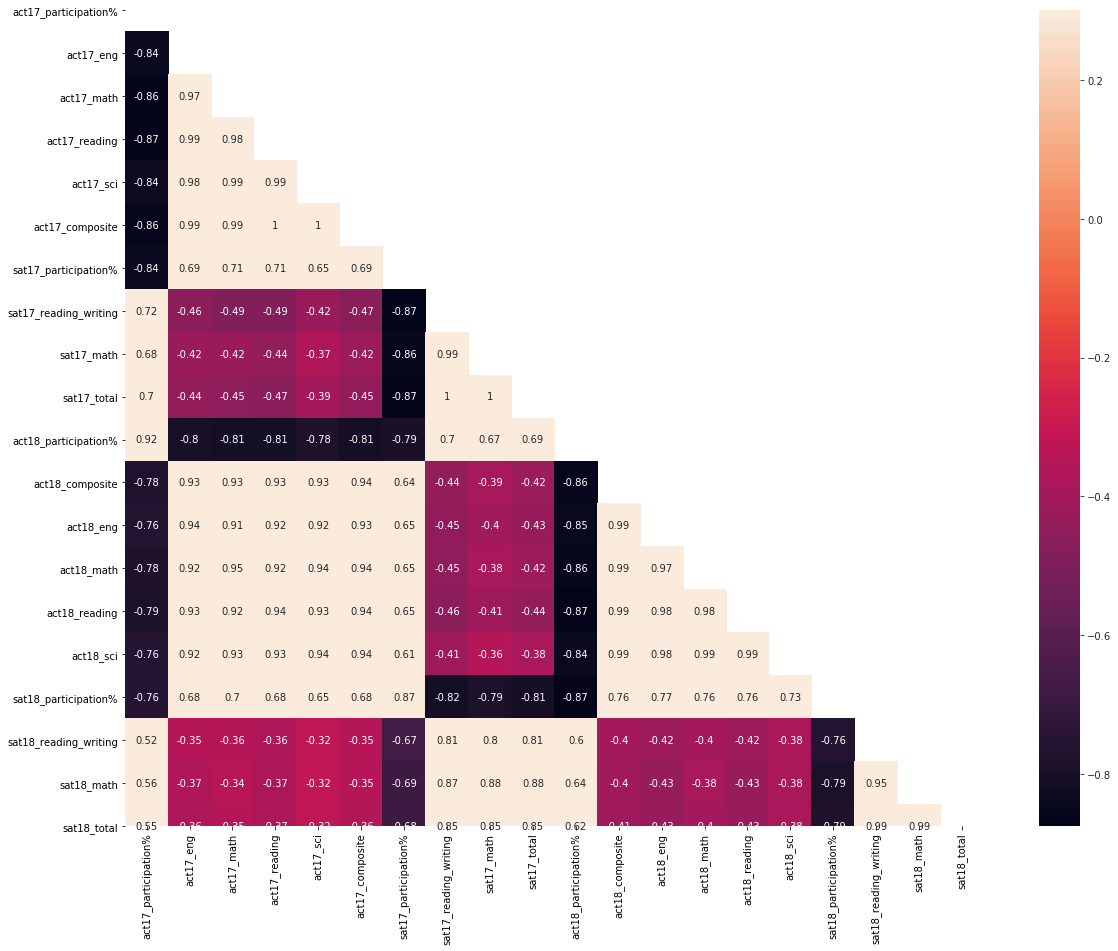

In [106]:
import seaborn as sns 

plt.subplots(figsize=(20,15))

#not sure how this mask works 
#not sure how to make the axes spread out from -1 to 1 
mask = np.zeros_like(big_reg)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(big_reg, mask=mask, vmax=.3, square=True, annot=True)
    
    

#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [107]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column]) # feel free to add more settings
        # Set titles, labels, etc here for each subplot
        
        
        
        
        

In [108]:
def subplot_histograms(ascp, ascpcol, list_of_titles, ascpcol):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column]) # feel free to add more settings
        # Set titles, labels, etc here for each subplot
        
        

        

SyntaxError: duplicate argument 'ascpcol' in function definition (<ipython-input-108-2b48018835be>, line 4)

In [ ]:

ascp.hist(figsize=(20,20));

Interpretation of Histograms depicting SAT and ACT participation rates against the total/composite scores:

There some evidence of 'inversion' of frequencies between participation rates and total/composite scores of ACT/SAT for both 2017 and 2018 - meaning that increasing participation fall in line with a fall in the frequency of higher scores. 

This could be due to the fact that participation rates were high in states where taking these tests were compulsory - meaning that even students who weren't prepared or interested had to take it, naturally leading to an increase in frequnecy of lower scores. conversely, in states where the tests are not mandated, only students who are interested/ better prepared will sit for these tests, leading to a higher frequency of higher test scores. 

ACT 17 participation is bimodal (30% range and 100%).
ACT 17 composite scores are bimodal as well (19-21 and 23-25). 

ACT 18 participation is bimodal (30% range and 100%).
ACT 18 composite scores are bimodal as well (19-21 and 23-24). 

SAT 17 participation % is right skewed. 
SAT 17 total scores are bi-modal too(1050-1100 and 1250) 

SAT 18 participation % is right skewed. 
SAT 18 total scores are bi-modal too(1050-1100 and 1250) 


Planning to subplot: ACT & SAT composite/total scores against their participation rates by year 
    
    so 2 x 4 subplot

In [ ]:
ascp= act_sat1718.iloc[:,[0,1,11,6,12,7,17,10,20]]

In [ ]:
ascp.head()

In [ ]:
ascpcol = ['state', 'act17_participation%', 'act18_participation%',
       'act17_composite', 'act18_composite', 'sat17_participation%',
       'sat18_participation%', 'sat17_total', 'sat18_total']

In [ ]:
col = ['state', 'act17_participation%', 'act17_eng', 'act17_math',
       'act17_reading', 'act17_sci', 'act17_composite', 'sat17_participation%',
       'sat17_reading_writing', 'sat17_math', 'sat17_total',
       'act18_participation%', 'act18_composite', 'act18_eng', 'act18_math',
       'act18_reading', 'act18_sci', 'sat18_participation%',
       'sat18_reading_writing', 'sat18_math', 'sat18_total']

In [ ]:
col2 = zip(list(range(0,22)),col)
col2 = dict(col2)
col2

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

Participation histograms are above 

In [109]:
math= act_sat1718.iloc[:,[3,14,9,19]]
verbal= act_sat1718.iloc[:,[4,8,15,18]]

math1= act_sat1718.iloc[:,[3]]
verbal1= act_sat1718.iloc[:,[4]]



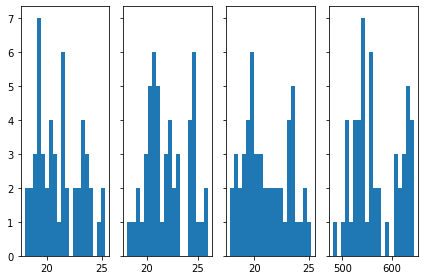

In [110]:
#Testing this method (but not sure how below works) 
n_bins = 20

x = act_sat1718.iloc[:,3]
y = act_sat1718.iloc[:,4]
a = act_sat1718.iloc[:,14]
b = act_sat1718.iloc[:,8]

fig, axs = plt.subplots(1,4, sharey=True, tight_layout=True)

# We can set the number of bins with the `bins` kwarg
axs[0].hist(x, bins=n_bins);
axs[1].hist(y, bins=n_bins);
axs[2].hist(a, bins=n_bins);
axs[3].hist(b, bins=n_bins);

In [111]:
col2

NameError: name 'col2' is not defined

Math scores for SAT & ACT

In [ ]:
math.hist(figsize=(10,10), bins=20);

ACT 2017 and 2018 math scores appear to be bi-modal - there is a spike in the 15 range and another in the 23 range. There are many plausible reasons for this phenomenon. one possible reason could be that there are 2 main types of test takers - states with more serious test takers keen on college and another group who has been mandated to take the test / less serious (e.g. due to state regulation) with all other states falling somewhere in the middle  

SAT 2017 and 2018 math scores are both slightly right skewed. 


Reading scores for SAT & ACT

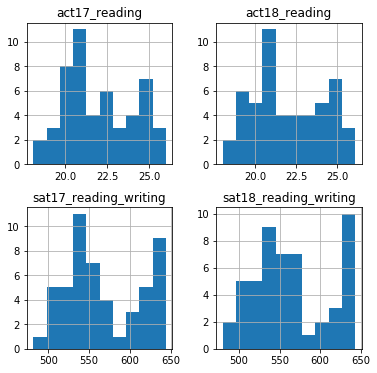

In [112]:
verbal.hist(figsize=(6,6));

Both ACT 2017 and 2018 reading scores have a bi-modal distribution (20-21 and 25) 

Both SAT 2017 and 2018 reading/writing scores are bimodal too (540-550 and 640) SAT 2018 reading writing scores shifts to the right indicating overall improvement in scores.



In [113]:
# Code

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


In [114]:
total17 = act_sat1718.iloc[:,[6,10]]

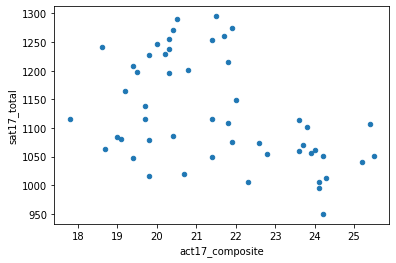

In [115]:
total17.plot(kind='scatter', x='act17_composite', y='sat17_total');

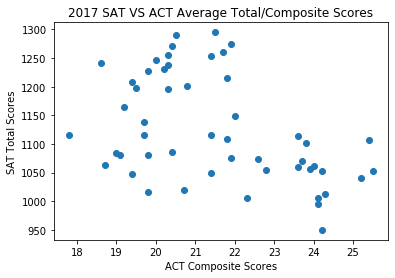

In [116]:
#reproducing the same graph using pyplot 
x= act_sat1718.iloc[:,[6]]
y = act_sat1718.iloc[:,[10]]
plt.scatter(x,y)
plt.title("2017 SAT VS ACT Average Total/Composite Scores")
plt.xlabel("ACT Composite Scores")
plt.ylabel("SAT Total Scores")
plt.show()


There is no apparent correlation between 2017 SAT and 2017 ACT total/composite scores 

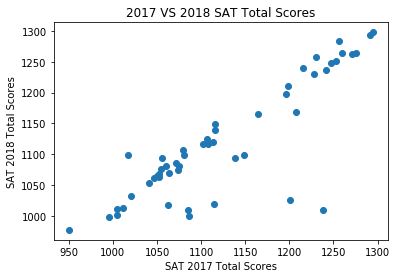

In [117]:
x= act_sat1718.iloc[:,[10]]
y = act_sat1718.iloc[:,[20]]
plt.scatter(x,y)
plt.title("2017 VS 2018 SAT Total Scores")
plt.xlabel("SAT 2017 Total Scores")
plt.ylabel("SAT 2018 Total Scores")
plt.show()

There appears to be strong positive linear relationship between SAT 2017 and 2018 total scores 

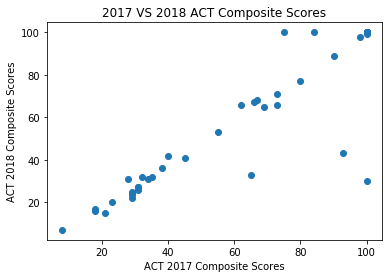

In [118]:
x= act_sat1718.iloc[:,[1]]
y = act_sat1718.iloc[:,[11]]
plt.scatter(x,y)
plt.title("2017 VS 2018 ACT Composite Scores")
plt.xlabel("ACT 2017 Composite Scores")
plt.ylabel("ACT 2018 Composite Scores")
plt.show()

There appears to be strong positive linear relationship between ACT 2017 and ACT 2018 composite scores - not possible to comment on why this might be true without further testing 

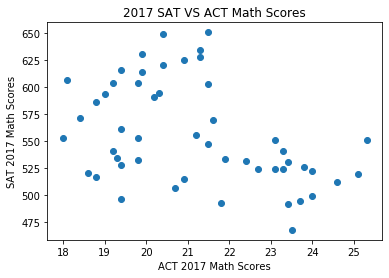

In [119]:
x= act_sat1718.iloc[:,[3]]
y = act_sat1718.iloc[:,[9]]
plt.scatter(x,y)
plt.title("2017 SAT VS ACT Math Scores")
plt.xlabel("ACT 2017 Math Scores")
plt.ylabel("SAT 2017 Math Scores")
plt.show()

There is no apparent correlation between 2017 SAT and 2017 ACT math scores 

In [120]:
col2

NameError: name 'col2' is not defined

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

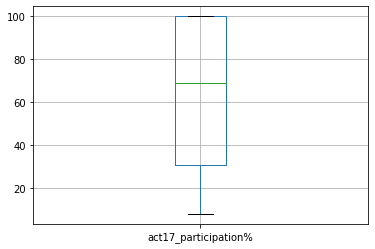

In [121]:
act_sat1718.boxplot(column='act17_participation%');
#act_sat1718.act17_participation%.plot(kind='box');

In [122]:
part = act_sat1718.iloc[:,[1,11,7,17]]

Boxplots comparing ACT and SAT 2017 and 2018 participation rates 

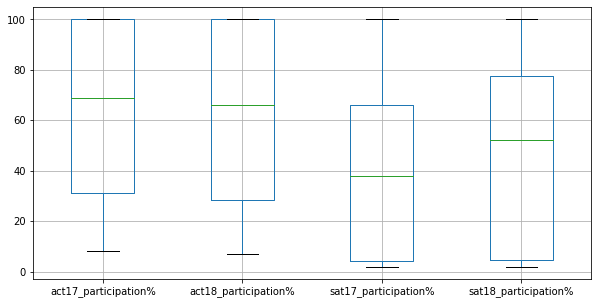

In [123]:
part.boxplot(figsize=(10,5));

same as above using trying out a different plot style 

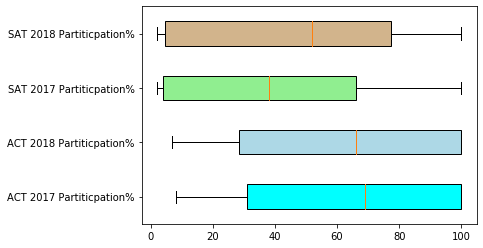

In [124]:
value1 = act_sat1718["act17_participation%"]
value2= act_sat1718["act18_participation%"]
value3= act_sat1718["sat17_participation%"]
value4= act_sat1718["sat18_participation%"]
 
box_plot_data=[value1,value2,value3,value4]
box=plt.boxplot(box_plot_data,vert=0,patch_artist=True,labels=['ACT 2017 Partiticpation%','ACT 2018 Partiticpation%','SAT 2017 Partiticpation%','SAT 2018 Partiticpation%'],
            )
 
colors = ['cyan', 'lightblue', 'lightgreen', 'tan']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
 
plt.show()

More than half the states taking the ACT in 2017 and 2018 had a participation rate that was equal to or higher than 75% of the states taking SAT in 2017. 

More than 25% of states had a 100% participation rate for the ACT in both 2017 and 2018.  

States have a preference for taking the ACT over the SAT.




In [125]:
ac_math = act_sat1718.iloc[:,[3,14]]
sa_math = act_sat1718.iloc[:,[9,19]]

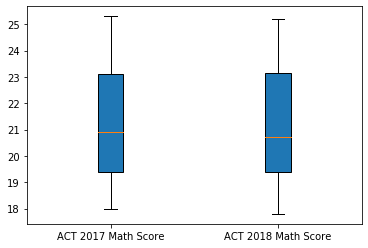

In [126]:
value1 = act_sat1718["act17_math"]
value2= act_sat1718["act18_math"]
 
box_plot_data=[value1,value2]
plt.boxplot(box_plot_data,patch_artist=True,labels=['ACT 2017 Math Score','ACT 2018 Math Score'])
plt.show()

ACT math scores are roughly similar over both years. 

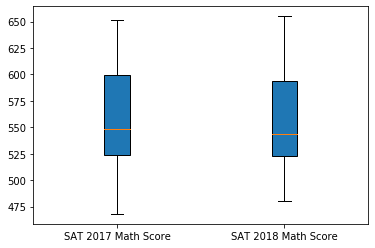

In [127]:
value1 = act_sat1718["sat17_math"]
value2= act_sat1718["sat18_math"]
 
box_plot_data=[value1,value2]
plt.boxplot(box_plot_data,patch_artist=True,labels=['SAT 2017 Math Score','SAT 2018 Math Score'])
plt.show()

Overall SAT math scores have improved from 2017 to 2018 - bottom 25% mark has increased 



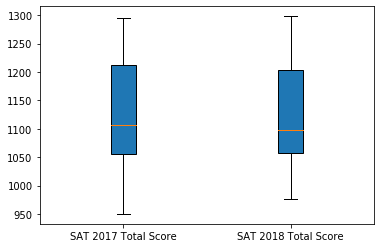

In [155]:
value1 = act_sat1718["sat17_total"]
value2= act_sat1718["sat18_total"]
 
box_plot_data=[value1,value2]
plt.boxplot(box_plot_data,patch_artist=True,labels=['SAT 2017 Total Score','SAT 2018 Total Score'])
plt.show()

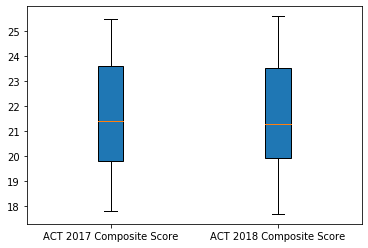

In [157]:
value1 = act_sat1718["act17_composite"]
value2= act_sat1718["act18_composite"]
 
box_plot_data=[value1,value2]
plt.boxplot(box_plot_data,patch_artist=True,labels=['ACT 2017 Composite Score','ACT 2018 Composite Score'])
plt.show()

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

In [128]:
act_sat1718.describe()

,act17_participation%,act17_eng,act17_math,act17_reading,act17_sci,act17_composite,sat17_participation%,sat17_reading_writing,sat17_math,sat17_total,act18_participation%,act18_composite,act18_eng,act18_math,act18_reading,act18_sci,sat18_participation%,sat18_reading_writing,sat18_math,sat18_total
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,65.254902,20.931373,21.182353,22.013725,21.450980,21.519608,39.803922,569.117647,556.882353,1126.098039,61.647059,21.486275,20.988235,21.125490,22.015686,21.345098,45.745098,563.686275,556.235294,1120.019608
std,32.140842,2.353677,1.981989,2.067271,1.739353,2.020695,35.276632,45.666901,47.121395,92.494812,34.080976,2.106278,2.446356,2.035765,2.167245,1.870114,37.314256,47.502627,47.772623,94.155083
min,8.000000,16.300000,18.000000,18.100000,18.200000,17.800000,2.000000,482.000000,468.000000,950.000000,7.000000,17.700000,16.600000,17.800000,18.000000,17.900000,2.000000,480.000000,480.000000,977.000000
25%,31.000000,19.000000,19.400000,20.450000,19.950000,19.800000,4.000000,533.500000,523.500000,1055.500000,28.500000,19.950000,19.100000,19.400000,20.450000,19.850000,4.500000,534.500000,522.500000,1057.500000
50%,69.000000,20.700000,20.900000,21.800000,21.300000,21.400000,38.000000,559.000000,548.000000,1107.000000,66.000000,21.300000,20.200000,20.700000,21.600000,21.100000,52.000000,552.000000,544.000000,1098.000000
75%,100.000000,23.300000,23.100000,24.150000,23.200000,23.600000,66.000000,613.000000,599.000000,1212.000000,100.000000,23.550000,23.700000,23.150000,24.100000,23.050000,77.500000,610.500000,593.500000,1204.000000
max,100.000000,25.500000,25.300000,26.000000,24.900000,25.500000,100.000000,644.000000,651.000000,1295.000000,100.000000,25.600000,26.000000,25.200000,26.100000,24.900000,100.000000,643.000000,655.000000,1298.000000


In [129]:
act_sat1718["sat18_reading_writing"].mode()

0    513
1    547
2    633
dtype: int64

Answers: (only going to describe the more interesting observations) 

1) SAT 2017 Participation %: 
SAT participation% for the 51 states form a continuous exponential distribution. Mode is 3% participation. 

Median of 38% is slightly lower than the mean of 39.8%, implying that data is slightly right-skewed. 

Wide range from 2-100% participation rate, with interquartile range (4-66%) implying that the data is quite spread out about the median (38%) We can infer that the middle 'half' of the data is leaning towards a lower participation rate (<66%) and aligns with implied right-skewness based on said median-mean comparison.

2) ACT 2017 Participation %:
ACT participation% for the 51 states form a continuous exponential distribution. Its mode is a 100% participation rate.

Median of 68% is slightly higher than the mean of 65.1%, implying that data is slightly left-skewed. ACT 17 participation is bimodal (30% range and 100% - which gives the mean of 65.1% - this is slightly deceptive as it gives the impression that on average most states have an average participation rate of 65%, which is not the case)

Wide range from 8-100% participation rate, with interquartile range (31-100%) implying that the data is quite spread out about the median (68%) We can infer that the middle 'half' of the data is leaning towards a higher participation rate (>31%) and aligns with implied left-skewness based on median mean comparison.

3) 2017 and 2018 SAT and ACT participation rates against the total/composite scores:

SAT 17 participation % is right skewed. (as above)
SAT 17 total scores are bi-modal too(1050-1100 and 1250) Mean:1126  Mode: 1005,1052 and 1116 Median: 1107

SAT 18 participation % is right skewed. Mean:45.7%   Mode:3,4%   Median: 52%
SAT 18 total scores are bi-modal too(1050-1100 and 1250) Mean: 1120   Mode:1010,1099,1117,1265  Median: 1098

ACT 17 participation is bimodal (30% range and 100%). (as above)
ACT 17 composite scores are bimodal as well (19-21 and 23-25). Mean:21.5   Mode:20,20.3,23.9  Median:21.3

ACT 18 participation is bimodal (30% range and 100%). Mean:61.6   Median: 66
ACT 18 composite scores are bimodal as well (19-21 and 23-24). Mean:21.4   Mode:20,20.3,23.9   Median:21.3 

Based on the boxplot diagrams, more than half the states taking the ACT in 2017 and 2018 had a participation rate that was equal to or higher than 75% of the states taking SAT in 2017. 

More than 25% of states had a 100% participation rate for the ACT in both 2017 and 2018.  

States have a preference for taking the ACT over the SAT.

There is some evidence of 'inversion' of frequencies between participation rates and total/composite scores of ACT/SAT for both 2017 and 2018 - meaning that increasing participation fall in line with a fall in the frequency of higher scores. 

This could be due to the fact that participation rates were high in states where taking these tests were compulsory - meaning that even students who weren't prepared or interested had to take it, naturally leading to an increase in frequnecy of lower scores. conversely, in states where the tests are not mandated, only students who are interested/ better prepared will sit for these tests, leading to a higher frequency of higher test scores. 

4) ACT 2017 and 2018 math scores  

ACT 2017 and 2018 math scores appear to be right skewed. 
ACT 2017 Math: Mode: 19.4 Mean:21.1 Median: 20.9 
ACT 2018 Math: Mode: 19.7, 20.3, 23.6 Mean: 21.1 Median: 20.7. ACT 2018 math scores are bi(tri)-modal. 

SAT 2017 and 2018 math scores are both slightly right skewed. 
SAT 2017 Math: Mode: 524 Mean:556.8 Median: 548 
SAT 2018 Math: Mode: 506,530,547,618,631 Mean: 556.2 Median: 544

5) ACT 2017 and 2018 Reading scores 

Both ACT 2017 and 2018 reading scores have a bi-modal distribution (20-21 and 25) 
ACT 2017 Reading: Mode:20.1,20.8  Mean:22 Median: 21.8 
ACT 2018 Reading: Mode:24.7  Mean:22  Median:21.6
                
Both SAT 2017 and 2018 reading/writing scores are bimodal too (540-550 and 640) SAT 2018 reading writing scores shifts to the right indicating overall improvement in scores.
SAT 2017 Reading: Mode:513,530  Mean: 569 Median:559  
SAT 2018 Reading: Mode:512,547,633  Mean: 563.6  Median: 552


#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

Answer: The metrics in this dataset are almost all not normally distributed. 


Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

Answer: 

1) ACT 2017 and 2018 math scores

ACT 2017 and 2018 math scores appear to be bi-modal - there is a spike in the 15 range and another in the 23 range.

SAT 2017 and 2018 math scores are both slightly right skewed.

2) ACT 2017 and 2018 Reading scores

Both ACT 2017 and 2018 reading scores have a bi-modal distribution (20-21 and 25)

Both SAT 2017 and 2018 reading/writing scores are bimodal too (540-550 and 640) SAT 2018 reading writing scores shifts to the right indicating overall improvement in scores.

3) Rates:

SAT 17 participation % is right skewed. (as above) SAT 17 total scores are bi-modal too(1050-1100 and 1250)

SAT 18 participation % is right skewed. SAT 18 total scores are bi-modal too(1050-1100 and 1250)

ACT 17 participation is bimodal (30% range and 100%). ACT 17 composite scores are bimodal as well (19-21 and 23-25).

ACT 18 participation is bimodal (30% range and 100%). ACT 18 composite scores are bimodal as well (19-21 and 23-24).


Implication: Bimodality results in a deceptive mean value that could be interepreted as being participation/math/reading scores that each country would have on average however this is not the case as the increased density of values in a lower and higher range results in this mean value. 


#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

Answer: No. Just looking at the SAT and ACT participation scores in one particular year alone will not yield any meaningful comparisons as it is a singular data point. Studying relationships between variables is more meaningful when N-observations are collected over a period of time such that N is big enough to establish a statistically significant result. SAT and ACT participation scores should also not be studied in isolation as there could be various other factors that could be affecting these scores that are not directly related to each other e.g. state specific laws, changes in population distribution etc. 


##### Is it appropriate to compare *these* specific SAT and ACT math scores? 

Why or why not?

Answer:

Same answer as above. Additionally, SAT and ACT scores are scaled differently which might make any interpretation of thier relationship difficult. e.g. increase ACT score by 1 is much more significant than a like increase for SAT.

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

In [ ]:
# Code:

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?

Gradually filtering by different criteria: 

Filtering by ACT & SAT 2017 and 2018 participation rates <= 50

In [133]:
act_sat1718[(act_sat1718["act17_participation%"] <= 50) & (act_sat1718["act18_participation%"] <= 50) & (act_sat1718["sat17_participation%"] <= 50) & (act_sat1718["sat18_participation%"] <= 50)]

,state,act17_participation%,act17_eng,act17_math,act17_reading,act17_sci,act17_composite,sat17_participation%,sat17_reading_writing,sat17_math,...,act18_participation%,act18_composite,act18_eng,act18_math,act18_reading,act18_sci,sat18_participation%,sat18_reading_writing,sat18_math,sat18_total
37,Oregon,40.0,21.2,21.5,22.4,21.7,21.8,43.0,560,548,...,42,21.3,20.6,20.9,21.9,21.1,48.0,564,553,1117


Filtering by ACT & SAT 2017 and 2018 participation rates <= 60

In [137]:
act_sat1718[(act_sat1718["act17_participation%"] <= 60) & (act_sat1718["act18_participation%"] <= 60) & (act_sat1718["sat17_participation%"] <= 60) & (act_sat1718["sat18_participation%"] <= 60)].T



,4,37
state,California,Oregon
act17_participation%,31,40
act17_eng,22.5,21.2
act17_math,22.7,21.5
act17_reading,23.1,22.4
act17_sci,22.2,21.7
act17_composite,22.8,21.8
sat17_participation%,53,43
sat17_reading_writing,531,560
sat17_math,524,548


Filtering by ACT & SAT 2017 and 2018 participation rates <= 65

In [136]:
act_sat1718[(act_sat1718["act17_participation%"] <= 65) & (act_sat1718["act18_participation%"] <= 65) & (act_sat1718["sat17_participation%"] <= 65) & (act_sat1718["sat18_participation%"] <= 65)].T


,1,4,14,37,45
state,Alaska,California,Indiana,Oregon,Vermont
act17_participation%,65,31,35,40,29
act17_eng,18.7,22.5,22,21.2,23.3
act17_math,19.8,22.7,22.4,21.5,23.1
act17_reading,20.4,23.1,23.2,22.4,24.4
act17_sci,19.9,22.2,22.3,21.7,23.2
act17_composite,19.8,22.8,22.6,21.8,23.6
sat17_participation%,38,53,63,43,60
sat17_reading_writing,547,531,542,560,562
sat17_math,533,524,532,548,551


In [139]:
act_sat1718[(act_sat1718["act17_participation%"] <= 65) & (act_sat1718["act18_participation%"] <= 65) & (act_sat1718["sat17_participation%"] <= 50) & (act_sat1718["sat18_participation%"] <= 50)].T


,1,37
state,Alaska,Oregon
act17_participation%,65,40
act17_eng,18.7,21.2
act17_math,19.8,21.5
act17_reading,20.4,22.4
act17_sci,19.9,21.7
act17_composite,19.8,21.8
sat17_participation%,38,43
sat17_reading_writing,547,560
sat17_math,533,548


Alaska and Oregon would be my primary candidates for sponsorship. 

Primary funnels:
1) Exclude all states with high SAT participation rates  
Reason: self explanatory as states with already high SAT rates will probably yield only marginal returns with incremental sponsorship 

2) Exclude all states with high ACT participation rates 
Reason: Since you would only need to do either the SAT or the ACT to gain admission to college, there is no need to push for higher participation rates in states where ACT participation rates are already high - this also makes sense from a business perspective as there is less competition to be had in states where both the SAT and ACT participation rates are low, all else being equal. (since students with limited resources and who are already taking the ACT need to be persuaded to either switch to the SAT or take both tests) 
Further justification is that states where ACT rates are high are usually a where ACT tests are state mandated it would thus not make commercial sense to compete in these states. 

Secondary funnels (deciding factor in event of tie):
3) Amongst the remaining states, potentially exclude lower performing states (but this is up for discussion depending on stated objectives e.g. perhaps sponsors want to fund higher performing states) + check for improvement of test scores between 2017 and 2018 
Reason: could select for states that have shown improvement in test scores from 2017 to 2018 as being indicative of being a high potential state. 
same could be said for states that have high scores but low participation 
however an alternative argument could be that states with low scores and low participation are the ones in need of the greatest need of extra support. 

4) check out eligible student populations 
Reason: student population size in shortlisted states - state with smaller student population could potentially yield higher increases in participation rates per dollar spent. sponsorship per student would also be higher which could result in higher overall test scores - bonus outcome. 

My final choice would be Alaska. Although both states have seen a similar increment in 5% of SAT % from 17 to 18, Alaska has the lower SAT participation % of the two. However, ACT rates are declining for Alaska whereas it is increasing for Oregon, possibly indicating that individuals are more open to switching from ACT to the SAT in Alaska compared to Oregon.

